# Importing libraries and showing the dataframe:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/fifa-world-cup-all-goals-1930-2022-dataset/FIFA World Cup All Goals 1930-2022.csv', encoding='latin-1')
df

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,key_id,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,...,shirt_number,player_team_id,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty
0,1,G-0001,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-28,...,0,T-28,France,FRA,19',19,0,first half,0,0
1,2,G-0002,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-28,...,0,T-28,France,FRA,40',40,0,first half,0,0
2,3,G-0003,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-28,...,0,T-28,France,FRA,43',43,0,first half,0,0
3,4,G-0004,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-44,...,0,T-44,Mexico,MEX,70',70,0,second half,0,0
4,5,G-0005,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-28,...,0,T-28,France,FRA,87',87,0,second half,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,2716,G-2716,WC-2022,2022 FIFA World Cup,M-2022-64,Argentina v France,12/18/2022,final,not applicable,T-03,...,11,T-03,Argentina,ARG,36',36,0,first half,0,0
2716,2717,G-2717,WC-2022,2022 FIFA World Cup,M-2022-64,Argentina v France,12/18/2022,final,not applicable,T-28,...,10,T-28,France,FRA,80',80,0,second half,0,1
2717,2718,G-2718,WC-2022,2022 FIFA World Cup,M-2022-64,Argentina v France,12/18/2022,final,not applicable,T-28,...,10,T-28,France,FRA,81',81,0,second half,0,0
2718,2719,G-2719,WC-2022,2022 FIFA World Cup,M-2022-64,Argentina v France,12/18/2022,final,not applicable,T-03,...,10,T-03,Argentina,ARG,108',108,0,"extra time, second half",0,0


# Which team has scored the most goals:

In [2]:
# group by team name and count goals in desc order
goals_by_team = df.groupby('team_name')['goal_id'].count()
goals_by_team = goals_by_team.sort_values(ascending=False)
print(f'{goals_by_team.index[0]} has scored the most goals in World Cup history.')

Brazil has scored the most goals in World Cup history.


# Which player has scored the most goals:

In [3]:
# create 'full_name' column
df['full_name'] = df['given_name'] + ' ' + df['family_name']

# group by player name and count goals in desc order
goals_by_player = df.groupby('full_name')['goal_id'].count()
goals_by_player = goals_by_player.sort_values(ascending=False)
print(f'{goals_by_player.index[0]} has scored the most goals in World Cup history.')

Miroslav Klose has scored the most goals in World Cup history.


# Percentage of goals scored in the first/second half:

In [4]:
# count goals scored in each period
goals_by_period = df['match_period'].value_counts()

# % of goals in each period
percent_firsthalf = round(goals_by_period['first half'] / len(df) * 100, 2)
percent_secondhalf = round(goals_by_period['second half'] / len(df) * 100, 2)
percent_overtime = round(100 - percent_firsthalf - percent_secondhalf, 2)

print(f'{percent_firsthalf}% of goals were scored in the first half.')
print(f'{percent_secondhalf}% of goals were scored in the second half.')
print(f'{percent_overtime}% of goals were scored in overtime.')

40.92% of goals were scored in the first half.
52.39% of goals were scored in the second half.
6.69% of goals were scored in overtime.


# Trend of own-goals and penalties over time:

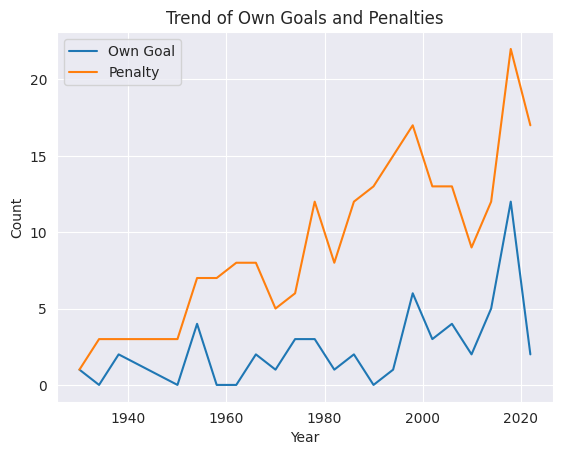

In [5]:
# group by year and sum own_goal and penalty column
df['match_year'] = pd.to_datetime(df['match_date']).dt.year
df_yearly = df.groupby('match_year')[['own_goal', 'penalty']].sum()

# create line chart
sns.set_style('darkgrid')
plt.plot(df_yearly.index, df_yearly['own_goal'], label='Own Goal')
plt.plot(df_yearly.index, df_yearly['penalty'], label='Penalty')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trend of Own Goals and Penalties')
plt.legend()
plt.show()

# Tournament goal statistics:

In [6]:
# group by tournament w number of goals and matches
goals_by_tournament = df.groupby('tournament_name').agg({'goal_id': 'count', 'match_id': 'nunique'})

# calculate avg goals per match
goals_by_tournament['avg_goals_per_match'] = goals_by_tournament['goal_id'] / goals_by_tournament['match_id']

# sort in desc order
goals_by_tournament = goals_by_tournament.sort_values(by='goal_id', ascending=False)

# get most goals by tournament and avg by match
most_goals_tournament = goals_by_tournament.index[0]
most_goals_count = goals_by_tournament.loc[most_goals_tournament, 'goal_id']
most_goals_avg = goals_by_tournament.loc[most_goals_tournament, 'avg_goals_per_match']

print(f'The {most_goals_tournament} tournament has the most goals in World Cup history with a total of {most_goals_count} goals.')
print(f'On average, there were {most_goals_avg:.2f} goals scored per match.')

The 2022 FIFA World Cup tournament has the most goals in World Cup history with a total of 172 goals.
On average, there were 3.02 goals scored per match.
